<a href="https://colab.research.google.com/github/a-apte/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/DS_Unit_2_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### LOADING DATA

In [2]:
# TODO - your work!

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df_raw = pd.read_csv(url, header = None)

print(df_raw.shape,"\n")

df_raw.head()

(32561, 15) 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### DATA DESCRIPTION

Target >50K, <=50K.

age: continuous

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### CLEANING DATA

In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital_status', 'occupation', 
             'relationship', 'race',  'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income' ]

df_raw.columns = col_names

df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
for col in df_raw.columns:
  print(df_raw[col].value_counts(),"\n")

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

164190     13
203488     13
123011     13
113364     12
121124     12
126675 

In [6]:
df_raw.isnull().sum() # Replaced by '?'

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### This is a weird dataset that wouldn't allow for replacement of "?".

In [0]:
# Columns with ?

# str_columns = ['workclass', 'occupation', 'native_country']

# for col in str_columns:
#   df_raw[col] = str(df_raw[col])
  
# df_raw.dtypes

In [0]:
# df_raw['workclass'].replace('?', np.nan, inplace = True)

# df_raw['workclass'].value_counts()

In [0]:
# df_raw.isnull().sum()

In [0]:
# for col in df_raw.columns:
#   print(df_raw[col].value_counts(),"\n")

#### Since df.replace is not working to replace '?', I will simply drop the features that have ? to create a new df.

In [7]:
str_columns = ['workclass', 'occupation', 'native_country']

df_next = df_raw.drop(str_columns, axis='columns')

df_next.head()

,age,fnlwgt,education,education-num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df_next.select_dtypes(include=numerics)

numeric_df.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [9]:
category_df = df_next.drop(numeric_df,axis='columns')

category_df.head()

,education,marital_status,relationship,race,sex,income
0,Bachelors,Never-married,Not-in-family,White,Male,<=50K
1,Bachelors,Married-civ-spouse,Husband,White,Male,<=50K
2,HS-grad,Divorced,Not-in-family,White,Male,<=50K
3,11th,Married-civ-spouse,Husband,Black,Male,<=50K
4,Bachelors,Married-civ-spouse,Wife,Black,Female,<=50K


In [10]:
for col in category_df.columns:
  print(category_df[col].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dty

In [44]:
24720 / (24720 + 7841)

0.7591904425539756

In [11]:
# This didn't work either for some reason?

# category_df['greater_50'] = 0
# category_df.greater_50.loc[category_df.income == '>50K'] = 1
# category_df['greater_50'].value_counts()



education_dum = pd.get_dummies(category_df.education)
marital_dum = pd.get_dummies(category_df.marital_status)
relation_dum = pd.get_dummies(category_df.relationship)
race_dum = pd.get_dummies(category_df.race)
gender_dum = pd.get_dummies(category_df.sex)
income_dum = pd.get_dummies(category_df.income)

dataframes_dum = [education_dum, marital_dum, relation_dum, race_dum, gender_dum, income_dum]

dummy_df = pd.concat(dataframes_dum, axis='columns')

dummy_df.head()



,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,...,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,<=50K,>50K
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [12]:
dummy_df.columns

Index([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',
       ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad',
       ' Masters', ' Preschool', ' Prof-school', ' Some-college', ' Divorced',
       ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Husband',
       ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried',
       ' Wife', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black',
       ' Other', ' White', ' Female', ' Male', ' <=50K', ' >50K'],
      dtype='object')

In [13]:
dummy_df.columns = dummy_df.columns.str.replace(' ', '')

dummy_df.columns

Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Husband', 'Not-in-family',
       'Other-relative', 'Own-child', 'Unmarried', 'Wife',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Female', 'Male', '<=50K', '>50K'],
      dtype='object')

In [14]:
# Deleting columns to avoid the dummy variable trap

cols_to_delete = ['HS-grad','Never-married','Not-in-family', 'White', 'Male', '<=50K']

dummy_df = dummy_df.drop(cols_to_delete, axis='columns')

dummy_df.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,...,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,Female,>50K
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


#### Combining the dataframes at last

In [15]:
df = pd.concat([numeric_df,dummy_df], axis='columns')

print(df.shape,"\n")

df.head()

(32561, 38) 



,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,10th,11th,12th,1st-4th,...,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,Female,>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [17]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss',
       'hours_per_week', '10th', '11th', '12th', '1st-4th', '5th-6th',
       '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate',
       'Masters', 'Preschool', 'Prof-school', 'Some-college', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Separated', 'Widowed', 'Husband', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander',
       'Black', 'Other', 'Female', '>50K'],
      dtype='object')

## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [18]:
df.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,10th,11th,12th,1st-4th,...,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,Female,>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [20]:
# TODO - your work!

# Outcome

y = df['>50K']
X = df.drop('>50K',axis='columns')

# X_num = df[numeric_df.columns]

print (X.shape, y.shape)

(32561, 37) (32561,)


In [21]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss',
       'hours_per_week', '10th', '11th', '12th', '1st-4th', '5th-6th',
       '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate',
       'Masters', 'Preschool', 'Prof-school', 'Some-college', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Separated', 'Widowed', 'Husband', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander',
       'Black', 'Other', 'Female'],
      dtype='object')

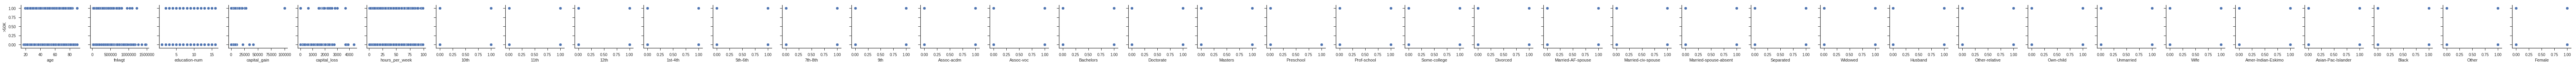

In [22]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

x_cols = ['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss',
       'hours_per_week', '10th', '11th', '12th', '1st-4th',
       '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors',
       'Doctorate', 'Masters', 'Preschool', 'Prof-school', 'Some-college',
       'Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Separated', 'Widowed', 'Husband',
       'Other-relative', 'Own-child', 'Unmarried', 'Wife',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'Female']


# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data = df, y_vars= '>50K', x_vars=x_cols)

**Scaling and Train-Test split**

In [23]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.5, random_state=237)


print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16280, 37) (16281, 37) (16280,) (16281,)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Model Fitting**

In [24]:
log_reg = LogisticRegression().fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
print("Coefficients")
for i in range(0,len(x_cols)):
  print("{} : {}".format(x_cols[i],log_reg.coef_[0][i]))

# len(log_reg.coef_)

# print (x_cols)

# print(log_reg.coef_[0][0])

Coefficients
age : 0.32721230094026776
fnlwgt : 0.09426716124685425
education-num : 0.4776809773689933
capital_gain : 2.407956949181562
capital_loss : 0.25902462408247395
hours_per_week : 0.41501898596724696
10th : -0.06557461669174805
11th : -0.07124184092145018
12th : -0.025347667792111676
1st-4th : -0.08949435995249881
5th-6th : -0.09236581686966135
7th-8th : -0.11268698867774773
9th : -0.048911962462202876
Assoc-acdm : 0.02073569037512971
Assoc-voc : 0.05450814145255744
Bachelors : 0.27068289942711543
Doctorate : 0.1386731424485504
Masters : 0.177399090655251
Preschool : -0.18002578177770437
Prof-school : 0.1556272281915566
Some-college : 0.09924600678628644
Divorced : 0.19450984254628317
Married-AF-spouse : 0.07006201583148988
Married-civ-spouse : 1.4924071092764273
Married-spouse-absent : -0.007786643768094879
Separated : 0.06281649109798258
Widowed : 0.13090666820400773
Husband : -0.4158144365755957
Other-relative : -0.22368344867110562
Own-child : -0.5188595077287943
Unmarried 

In [38]:
print("Intercept:", log_reg.intercept_[0])

Intercept: -1.9679907026337122


**Accuracy Scoring**

In [39]:
print("Training score:",log_reg.score(X_train, y_train))
print("Testing score:",log_reg.score(X_test, y_test))

Training score: 0.8443488943488944
Testing score: 0.8413488114980652


In [40]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test)

accuracy_score(y_test, y_pred)

0.8413488114980652

**Mean squared error**

In [41]:
from sklearn.metrics import mean_squared_error

print("MSE training:",mean_squared_error(y_train, log_reg.predict(X_train)))
print("MSE testing:",mean_squared_error(y_test, log_reg.predict(X_test)))

MSE training: 0.15565110565110565
MSE testing: 0.15865118850193477


**Confusion Matrix: 1 = "incomes above $50k"**

In [43]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True, normalize=True)

Predicted,0,1,All
Actual,,,
0,0.702045,0.054849,0.756895
1,0.103802,0.139303,0.243105
All,0.805847,0.194153,1.000000


#### Statsmodels attempt - DIDN'T WORK

In [0]:
# dir(sm)

In [0]:
# logit = sm.Logit(y_train, X_train)

# result = logit.fit()

# print (result.summary())

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

        1. What are 3 features positively correlated with income above 50k?
        2. What are 3 features negatively correlated with income above 50k?
        3. Overall, how well does the model explain the data and what insights do you derive from it?
        
**1 and 2) Positive versus negative correlation is determined by the *sign* of the coefficient. **

Three positively correlated features: **age, capital gain, having a bachelor's degree**

Three negatively correlted features: **not graduating high school, race (relative to "White"), gender (relative to "Male")**

**3) The model does a fairly decent job of explaining those with incomes over 50k versus those that don't (around 84% accuracy) and there doesn't to seem to be issues with overfit or underfit. The insights that one can draw from these results are that crossing a 50k dollar income threshold is influenced by one's age, having investment income or loss, education level, race, and gender**

**Matching**


          1) You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
          
          2) You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
          
          3) You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.


1) Quantile Regression (key words: 'at-risk, 'bottom tier') because one wants to see regression results for a specific quantile of the larger group.

2) Survival Analysis (key words: 'predict when') because one wants to model when an event is expected to occur.

3) Ridge Regression (key words: 'only of a few dozen plants at a time') because one wants a more robust regression model.